In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Norm Equation

In [2]:
# Norm equation
X = 2 * np.random.rand(100, 1)
y = 4 + 3* X + np.random.randn(100, 1)
X_b = np.c_[np.ones((100, 1)), X]

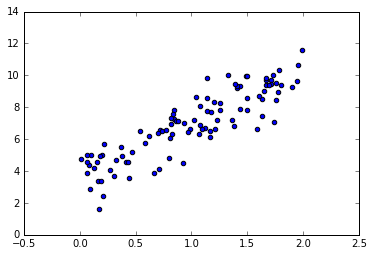

In [3]:
%matplotlib inline
plt.scatter(X, y)

In [4]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[ 3.64147369],
       [ 3.32108107]])

In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)

In [6]:
y_predict

array([[  3.64147369],
       [ 10.28363582]])

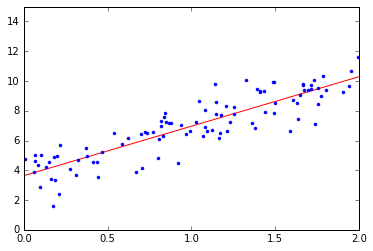

In [7]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print lin_reg.intercept_
print lin_reg.coef_
print lin_reg.predict(X_new)

[ 3.64147369]
[[ 3.32108107]]
[[  3.64147369]
 [ 10.28363582]]


/Users/lgrcyanny/Library/Python/2.7/lib/python/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


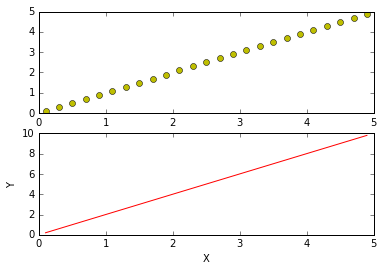

In [9]:
data = np.arange(0.1, 5, 0.2)
plt.figure()
plt.subplot(211)
plt.plot(data, data, 'yo')
plt.subplot(212)
plt.plot(data, 2 * data, 'r-')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# 2. Grandient Descent

In [13]:
# batch grandient descent
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X_b = np.c_[np.ones((100, 1)), X]

In [34]:
eta = 0.02  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # random initialization
for iteration in range(n_iterations):
    gradients = (2.0/m) * X_b.T.dot(X_b.dot(theta) - y) # not 2/m, must be 2.0/m, otherwise, gradients will be 0
    theta = theta - eta * gradients
theta

array([[ 4.22122753],
       [ 2.78361056]])

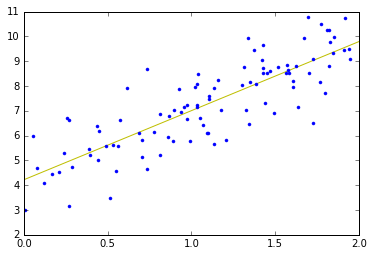

In [35]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta)
plt.figure()
plt.plot(X_new, y_predict, "y-")
plt.plot(X, y, "b.")
plt.show()

In [44]:
# SDG Gradient Descent
n_epochs = 10
t0, t1 = 5, 50
m = 100
def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1] # only one row
        yi = y[random_index:random_index + 1] # 
        gradients = 2.0 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * 1.0 * m + i) # epoch mul 1.0 to double value
        theta = theta - eta * gradients
theta

array([[ 4.1384937 ],
       [ 2.92357169]])

In [45]:
# Use sklearn SGDClassifier
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter = 50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

/usr/local/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:73: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=50, n_iter=None, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [47]:
sgd_reg.intercept_

array([ 4.21035843])

In [48]:
sgd_reg.coef_

array([ 2.74569383])

# 3. Polynomial Regression

In [64]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [84]:
def plot_data(X, y, predictions=None):
    plt.figure()
    plt.plot(X, y, 'b.')
    if predictions is not None:
        plt.plot(X, predictions, 'y*')
    plt.show()

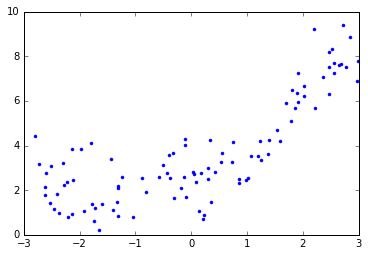

In [82]:
plot_data(X, y)

In [79]:
# add polynominal features
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_poly[0]

array([-1.30756112,  1.70971608])

[ 2.43411738]
[[ 0.98571749  0.38783505]]


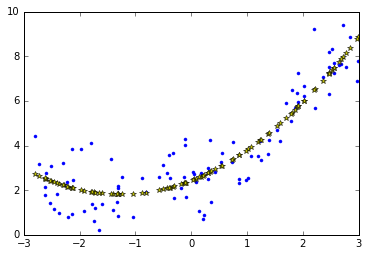

In [85]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print lin_reg.intercept_
print lin_reg.coef_
predictions = lin_reg.predict(X_poly)
plot_data(X, y, predictions)

# 4. Learning Curves

In [86]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

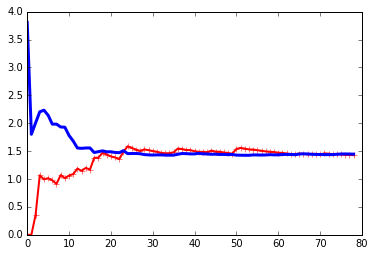

In [87]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

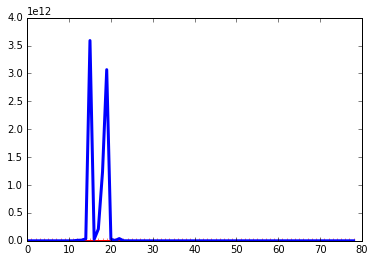

In [91]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=20, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)

# 5. Regularized Methods

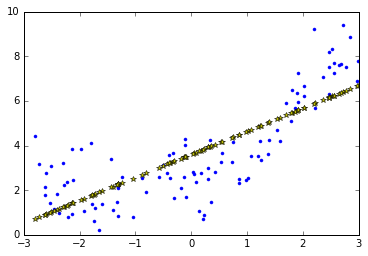

In [93]:
# Ridge Regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
predictions = ridge_reg.predict(X)
plot_data(X, y, predictions)

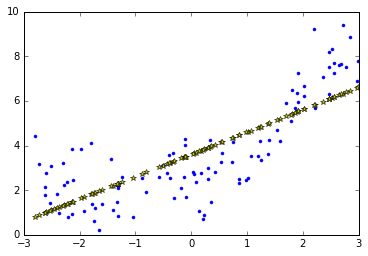

In [94]:
# Lasso Regression
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
predictions = lasso_reg.predict(X)
plot_data(X, y, predictions)

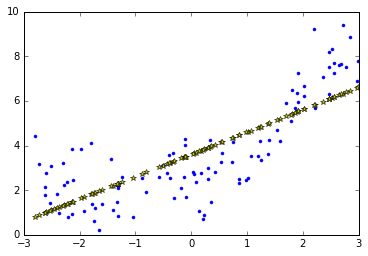

In [96]:
# Elastic Net
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
predictions = elastic_net.predict(X)
plot_data(X, y, predictions)

/usr/local/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:73: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


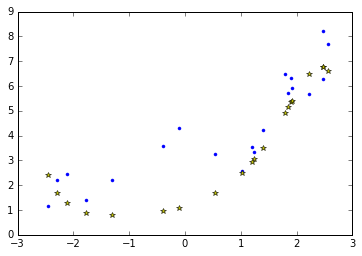

In [101]:
# early stopping
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
pipeline = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("scaler", StandardScaler()),
])
X_train_poly_scaled = pipeline.fit_transform(X_train)
X_val_poly_scaled = pipeline.fit_transform(X_val)
sgd_reg = SGDRegressor(n_iter=1, warm_start=True, penalty=None,
                       learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)
plot_data(X_val, y_val, y_val_predict)

# 6. Logistic Regression

In [102]:
from sklearn.datasets import load_iris

In [103]:
iris = load_iris()

In [105]:
iris.keys()

['target_names', 'data', 'target', 'DESCR', 'feature_names']

In [119]:
X = iris.data[:, 3:]
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0

In [120]:
from sklearn.linear_model import LogisticRegression

In [121]:
lr_reg = LogisticRegression()
lr_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

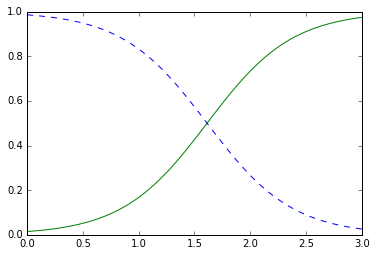

In [122]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = lr_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
# + more Matplotlib code to make the image look pretty

In [123]:
# Use softmax regression
X = iris["data"] # petal length, petal width
y = iris["target"]
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [130]:
softmax_reg.predict_proba(X[0].reshape(1, -1))

array([[  9.97228696e-01,   2.77130368e-03,   3.74200673e-15]])